In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the project directory in Google Drive
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

# Verify paths
print("Current Directory:", os.getcwd())
print("Dataset Folder Contents:", os.listdir('Data/chest_xray'))

Mounted at /content/drive
Current Directory: /content/drive/My Drive/Colab Notebooks
Dataset Folder Contents: ['test', 'train', 'val']


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/Data/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/IM-0742-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/NORMAL2-IM-0403-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/NORMAL2-IM-0397-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/IM-0748-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/NORMAL2-IM-0401-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/IM-0757-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/IM-0747-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/NORMAL2-IM-0384-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/IM-0764-0001.jpeg
/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/NORMAL/NORMAL2-IM-0395-0001-0002.jpeg
/content/drive/My Drive/Colab Note

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import cv2
import os

from tqdm import tqdm

In [4]:
labels=["PNEUMONIA","NORMAL"]
img_size=150

In [5]:
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    print("Read image error")
                    continue
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print("Error:", e)
    return np.array(data, dtype=object)

train=get_training_data("/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train")
test=("/content/drive/My Drive/Colab Notebooks/Data/chest_xray/test")
val=("/content/drive/My Drive/Colab Notebooks/Data/chest_xray/val")

<Axes: ylabel='count'>

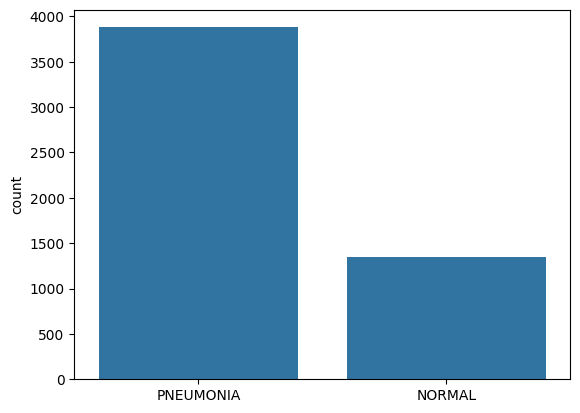

In [6]:
l=[]
for i in train:
    if(i[1]==0):
        l.append("PNEUMONIA")
    else:
        l.append("NORMAL")

sns.countplot(x=l)

In [7]:
x_train=[]
y_train=[]

x_test=[]
y_test=[]

x_val=[]
y_val=[]

for feature,label in train:
    x_train.append(feature)
    y_train.append(label)

for feature,label in train:
    x_test.append(feature)
    y_test.append(label)

for feature,label in train:
    x_val.append(feature)
    y_val.append(label)

Text(0.5, 1.0, 'PNEUMONIA')

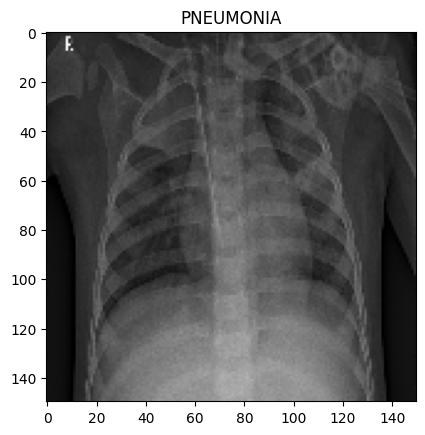

In [8]:
plt.figure()
plt.imshow(train[0][0],cmap="gray")
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'NORMAL')

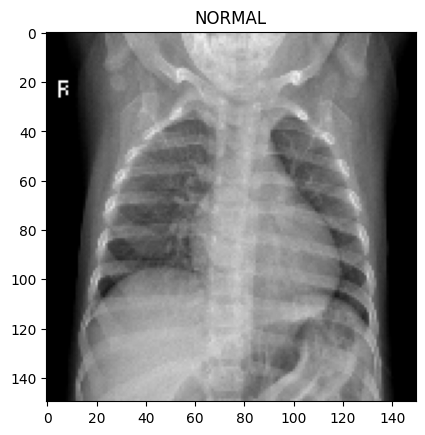

In [9]:
plt.figure()
plt.imshow(train[-1][0],cmap="gray")
plt.title(labels[train[-1][1]])

In [10]:
x_train=np.array(x_train)/255
x_test=np.array(x_test)/255
x_val=np.array(x_val)/255

In [11]:
x_train=x_train.reshape(-1,img_size,img_size,1)
x_test=x_test.reshape(-1,img_size,img_size,1)
x_val=x_val.reshape(-1,img_size,img_size,1)


In [12]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)


In [13]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # Centre les données en mettant la moyenne générale à zéro
    samplewise_center=False,    # Centre chaque exemple en mettant sa moyenne à zéro
    featurewise_std_normalization=False,  # Normalise les données en divisant par l'écart type général
    samplewise_std_normalization=False,   # Normalise chaque exemple en le divisant par son propre écart type
    zca_whitening=False,       # Applique la méthode ZCA pour réduire la corrélation entre les caractéristiques
    rotation_range=30,         # Fait pivoter les images de manière aléatoire jusqu'à 30 degrés
    zoom_range=0.2,           # Effectue un zoom aléatoire sur les images
    width_shift_range=0.1,    # Décale les images horizontalement de manière aléatoire
    height_shift_range=0.1,   # Décale les images verticalement de manière aléatoire
    horizontal_flip=True,      # Retourne les images horizontalement de manière aléatoire
    vertical_flip=True         # Retourne les images verticalement de manière aléatoire
)
datagen.fit(x_train)          # Ajuste le générateur sur l'ensemble d'apprentissage

In [14]:
model = Sequential()
model.add(Conv2D(128, (7, 7), strides=1, padding="same", activation="relu", input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=1, padding="same"))

# Second Convolutional Block
model.add(Conv2D(64, (5, 5), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

# Third Convolutional Block
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

# Compile the Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 128)       │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150, 150, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 150, 150, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,914,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,145,505 (23.44 MB)

 Trainable params: 6,145,057 (23.44 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback for learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=2, verbose=1, factor=0.3, min_lr=0.000001
)

# Set the number of epochs
epoch_number = 3

# Fit the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=epoch_number,
    validation_data=datagen.flow(x_test, y_test),
    callbacks=[learning_rate_reduction]
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss of Model:", loss)
print("Accuracy of Model:", accuracy * 100)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 76s 342ms/step - accuracy: 0.7548 - loss: 2.6809 - val_accuracy: 0.7422 - val_loss: 11.5768 - learning_rate: 0.0010
Epoch 2/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.8603 - loss: 0.3248 - val_accuracy: 0.7422 - val_loss: 8.5795 - learning_rate: 0.0010
Epoch 3/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - accuracy: 0.8603 - loss: 0.3234 - val_accuracy: 0.8724 - val_loss: 0.3617 - learning_rate: 0.0010
164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9122 - loss: 0.2220
Loss of Model: 0.25393471121788025
Accuracy of Model: 89.86228108406067


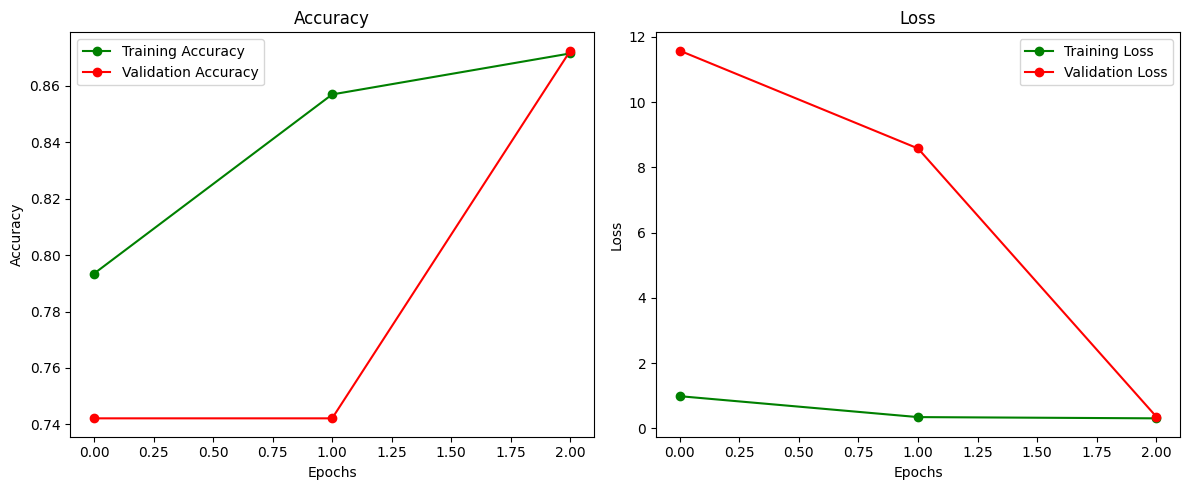

In [16]:
import matplotlib.pyplot as plt

# Epochs listesi
epochs = [i for i in range(epoch_number)]

# Grafik oluşturma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # figsize ile boyut belirleyin

# Eğitim ve doğrulama metrikleri
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

# Eğitim ve doğrulama doğruluğu
ax[0].plot(epochs, train_acc, "go-", label="Training Accuracy")
ax[0].plot(epochs, val_acc, "ro-", label="Validation Accuracy")
ax[0].legend()
ax[0].set_title("Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Eğitim ve doğrulama kaybı
ax[1].plot(epochs, train_loss, "go-", label="Training Loss")
ax[1].plot(epochs, val_loss, "ro-", label="Validation Loss")
ax[1].legend()
ax[1].set_title("Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

# Grafik gösterimi
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [18]:
# Assuming `train` contains images and labels
X = np.array([item[0] for item in train])  # Extract images
Y = np.array([item[1] for item in train])  # Extract labels

In [19]:
# Normalize images
X = X / 255.0

# Reshape images into sequences for LSTM (e.g., 150x150 images become sequences of 150 elements each of length 150)
sequence_length = X.shape[1]  # Assuming square images
X_seq = X.reshape(X.shape[0], sequence_length, sequence_length)

# One-hot encode labels
Y = to_categorical(Y, num_classes=2)

# Split into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_seq, Y, test_size=0.2, random_state=42)

In [20]:
# Define LSTM model
model_lstm = Sequential([
    LSTM(128, input_shape=(sequence_length, sequence_length), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7362 - loss: 0.5595 - val_accuracy: 0.7476 - val_loss: 0.5040
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7767 - loss: 0.4610 - val_accuracy: 0.7285 - val_loss: 0.4642
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7643 - loss: 0.4548 - val_accuracy: 0.8117 - val_loss: 0.4316
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7876 - loss: 0.4330 - val_accuracy: 0.7887 - val_loss: 0.4253
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8015 - loss: 0.4120 - val_accuracy: 0.8031 - val_loss: 0.4059
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7953 - loss: 0.4156 - val_accuracy: 0.8031 - val_loss: 0.4172
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8313 - loss: 0.3702 - val_accuracy: 0.8547 - val_loss: 0.3409
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8725 - loss: 0.3209 - val_accu

In [22]:
# Evaluate the model on validation data
val_loss, val_accuracy = model_lstm.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8967 - loss: 0.2214
Validation Loss: 0.23602978885173798, Validation Accuracy: 0.8986615538597107
